In [29]:
import torch as t
import math
import numpy as np

FRAME_TIME = 0.1  # time interval
GRAVITY_ACCEL = 0.12  # gravity constant
BOOST_ACCEL = 0.18  # thrust constant
ROTATION_ACCEL = np.radians(20)  # rotation constant

action = t.tensor([0.5, 1.])
state = t.tensor([0.7854, 0., 0., 0., 0., 0.])

delta_state_ori = ROTATION_ACCEL* FRAME_TIME*t.tensor([0., 1, 0., 0., 0., 0.])

sin = t.matmul(t.tensor([[0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [-1., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.]]),t.sin(state))
cos = t.matmul(t.tensor([[0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [1., 0., 0., 0., 0., 0.]]),t.cos(state))
print(sin)
print(cos)
cos_sin = cos+sin
delta_state_pos = BOOST_ACCEL* FRAME_TIME*t.tensor([0., 0., 0., 1., 0., 1.])*cos_sin # x and y components of acceleration

delta_state_combine = delta_state_ori + delta_state_pos

action_mat = t.tensor([[0., 0.],
                 [2., 0.],
                 [0., 0.],
                 [0., 1.],
                 [0., 0.],
                 [0., 1.]])
a_a = t.matmul(action_mat, action) + t.tensor([0., -1., 0., 0., 0., 0.]) # get ori and pos accelerations
print(a_a)

delta_state = delta_state_combine*a_a

state_gravity = GRAVITY_ACCEL * FRAME_TIME*t.tensor([0., 0., 0., 0., 0., -1.])
state = state + delta_state + state_gravity

step_mat = t.tensor([[1., FRAME_TIME, 0., 0., 0., 0.],
                     [0., 1., 0., 0., 0., 0.],
                     [0., 0., 1., FRAME_TIME, 0., 0.],
                     [0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 1., FRAME_TIME,],
                     [0., 0., 0., 0., 0., 1.]])
state = t.matmul(step_mat, state)

print(state)


tensor([ 0.0000,  0.0000,  0.0000, -0.7071,  0.0000,  0.0000])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7071])
tensor([0., 0., 0., 1., 0., 1.])
tensor([ 7.8540e-01,  0.0000e+00, -1.2728e-03, -1.2728e-02,  7.2790e-05,
         7.2790e-04])


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# # Print model's state_dict
# print("Model's state_dict:")
# for param_tensor in net.state_dict():
#     print(param_tensor, "\t", net.state_dict()[param_tensor].size())
#
# print()
#
# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

print(net.state_dict())

OrderedDict([('conv1.weight', tensor([[[[ 0.0541,  0.0358,  0.0933, -0.0983, -0.0015],
          [ 0.1061,  0.0313,  0.0573, -0.0078, -0.0087],
          [ 0.0274, -0.0813, -0.0788, -0.0498,  0.1061],
          [-0.0121, -0.0934, -0.0142,  0.0535, -0.0380],
          [-0.0934, -0.0225,  0.0943,  0.0906,  0.0589]],

         [[ 0.1063,  0.0828,  0.1054,  0.0239,  0.0096],
          [ 0.0099, -0.0709, -0.0690,  0.0276,  0.0527],
          [-0.0813, -0.0486,  0.0116, -0.0870, -0.1106],
          [-0.0174,  0.0750,  0.0046, -0.0241,  0.0161],
          [ 0.0254,  0.0295,  0.0094,  0.0881,  0.1014]],

         [[-0.0323,  0.0521, -0.0886,  0.0213,  0.0247],
          [-0.0520, -0.0353,  0.0088,  0.0108,  0.1007],
          [ 0.0661,  0.0086, -0.1152, -0.0137, -0.1054],
          [ 0.0346,  0.0951, -0.1034,  0.0206, -0.0243],
          [ 0.0796,  0.0372, -0.0740, -0.0020,  0.0484]]],


        [[[-0.0091,  0.0723,  0.1051,  0.0910,  0.0996],
          [-0.0705,  0.0943, -0.0543, -0.0632,  0.

In [31]:
import torch as t
import numpy as np
import math
import random

N=5
initial = np.zeros((N,6))
for i in range(N):
    initial[i] = [math.pi*(random.random()-0.5), 0.1*math.pi*(random.random()-0.5), # orientation state
             (random.random()-0.5), 0.1*(random.random()-0.5), # horizontal state
             0.5*(random.random()+1), -0.1*random.random()]  # vertical state

print(initial)
state = t.from_numpy(initial)
print(state)
print(t.tensor(initial, requires_grad=False).float())

[[-1.22687832e+00 -1.43382086e-01 -4.04160376e-01  2.78635281e-05
   9.20983136e-01 -3.44057860e-03]
 [-9.71739146e-01 -5.78271909e-02  4.79079973e-01  3.21300437e-02
   7.47666970e-01 -6.55236858e-02]
 [-1.30735864e+00  1.36263639e-01 -4.54463433e-02 -3.18200644e-02
   6.58377199e-01 -1.79491367e-02]
 [ 4.55668664e-01 -6.29541138e-02  4.43013476e-01 -4.75639483e-02
   7.17584587e-01 -7.21382713e-02]
 [ 9.59209327e-01 -1.07801847e-01 -1.90450130e-01 -1.42433083e-02
   5.03625377e-01 -8.95606827e-02]]
tensor([[-1.2269e+00, -1.4338e-01, -4.0416e-01,  2.7864e-05,  9.2098e-01,
         -3.4406e-03],
        [-9.7174e-01, -5.7827e-02,  4.7908e-01,  3.2130e-02,  7.4767e-01,
         -6.5524e-02],
        [-1.3074e+00,  1.3626e-01, -4.5446e-02, -3.1820e-02,  6.5838e-01,
         -1.7949e-02],
        [ 4.5567e-01, -6.2954e-02,  4.4301e-01, -4.7564e-02,  7.1758e-01,
         -7.2138e-02],
        [ 9.5921e-01, -1.0780e-01, -1.9045e-01, -1.4243e-02,  5.0363e-01,
         -8.9561e-02]], dtype=to

In [32]:
import torch as tf
a = tf.ones((1, 6))
print(a)
b = tf.ones((1, 6))
print(b)
c = tf.matmul(a, b)
print(c)

tensor([[1., 1., 1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1., 1.]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 1x6)

In [38]:
import torch
my_list = [torch.randn(3, 5), torch.randn(3, 5)]
result = torch.stack(my_list, dim=0).abs().sum(dim=0).sum(dim=0)
print(my_list) #torch.Size([5])
print('C')
print(result)

[tensor([[ 0.7918,  0.4316,  0.5074, -0.7955, -0.7166],
        [ 0.0311, -0.8669, -0.3061,  0.1821, -0.6131],
        [ 0.8762,  0.2780, -0.5602, -0.7466,  0.6070]]), tensor([[-0.5836, -0.2287, -0.6798, -1.5697, -0.4602],
        [ 0.0624,  0.7036, -1.5324, -0.9347,  0.2301],
        [-0.5355,  0.8844,  0.6417,  0.6791, -0.8348]])]
C
tensor([2.8806, 3.3932, 4.2277, 4.9076, 3.4618])


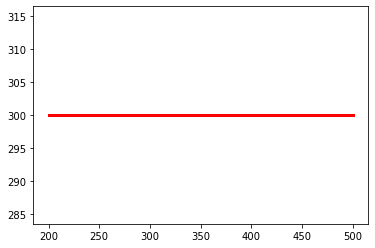

In [6]:
import matplotlib.pyplot as plt


x = [200, 500]
y = [300, 300]
plt.plot(x, y, color="red", linewidth=3)
plt.show()

In [48]:
epoch = 0
max_epoch = 10
while  epoch <= max_epoch:

            print(epoch)
            epoch += 1


0
1
2
3
4
5
6
7
8
9
10
